In [1]:
from __future__ import print_function

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import np_utils

from RBM import *

%matplotlib inline

Using TensorFlow backend.


In [3]:
images = np.load('toy_data/dataset_basicshape_v0_image.npy')
X_train = images[:800]
X_test  = images[800:1000]
print(X_train.shape, X_test.shape)

(800, 64, 64) (200, 64, 64)


In [4]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32').T/255
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32').T/255

In [5]:
labels = np.genfromtxt('toy_data/dataset_basicshape_v0_catalog.csv', delimiter=',')
labels = labels[:,[5]].astype(int)
y_train = labels[:800]
y_test = labels[800:1000]

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_train.shape[1]

In [6]:
rbm = RBM(v_dim = num_pixels, h_dim = 100)

In [7]:
rbm.train(X_train, epochs = 5, batch_size = 20, learning_rate = .1, plot=False)

Epoch 1
Reconstruction MSE = 0.33
Epoch 2
Reconstruction MSE = 0.00
Epoch 3
Reconstruction MSE = 0.00
Epoch 4
Reconstruction MSE = 0.00
Epoch 5
Reconstruction MSE = 0.00


In [8]:
rbm.save('weightsRBM/test')

In [9]:
weights = rbm = rbm.from_File("weightsRBM/test")

In [10]:
image_no = 5
v,_ = rbm.gibbs_sampling(1,1,X_train[:,image_no].reshape((num_pixels,1)))

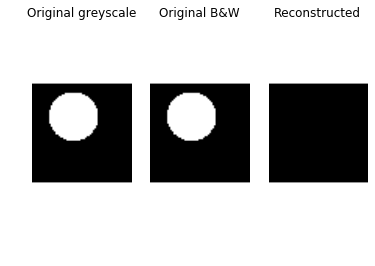

In [11]:
f, ax = plt.subplots(1,3, sharex=True)
ax[0].imshow(X_train[:,image_no].reshape((64,64)),cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title("Original greyscale")
ax[1].imshow(X_train[:,image_no].reshape((64,64)),cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title("Original B&W")
ax[2].imshow(v.reshape((64,64)),cmap=plt.cm.gray)
ax[2].axis('off')
ax[2].set_title("Reconstructed")
plt.show()

In [13]:
# If that works then we can use the autoencoder to pretrain with RBM weights
# So we are going to add a few dense layer with keras and the last 
# will be of 2 dim for classification